---
## Package install

In [ ]:
!pip install statannot

In [ ]:
!pip install scipy

---
## Table format
* target.csv 파일로 같은 폴더 안에 위치시키세요
* name = boxxplot을 분류할 대상
* type = boxplot 이름 (최대 25종류까지 가능)
* value = 발현값

In [11]:
table

,name,type,value
0,good,1,7.315725
1,good,1,8.270534
2,good,1,9.318809
3,good,1,10.139119
4,good,1,8.884487
...,...,...,...
447,poor,1,9.003831
448,poor,1,4.333055
449,poor,1,7.165610
450,poor,1,6.802314


---
## Color
* color pallete 설정하기. seaborn color pallete에 대응합니다<br>
---
### pallete 예시
* rocket　　　
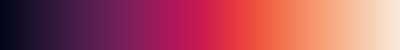
<br>
* mako　　　
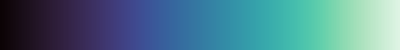
<br>
* vlag　　　
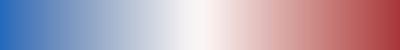

In [1]:
pallete = input("color pallete")

color pallete bright


---
## Theme
* 그래프 테마를 정합니다
* whitegrid, darkgrid 등 seaborn.set_style에 대응합니다

In [2]:
theme = input("theme")

theme whitegrid


---
## Program
* res.png 파일로 저장됩니다

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

T1 v.s. T2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-2.741e-01
T2 v.s. T3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.243e+00
T3 v.s. T4: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.346e-01
T1 v.s. T3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.138e+00
T2 v.s. T4: t-test independent samples with Bonferroni correction, P_val=2.607e-01 stat=-2.065e+00
T1 v.s. T4: t-test independent samples with Bonferroni correction, P_val=5.281e-01 stat=-1.747e+00


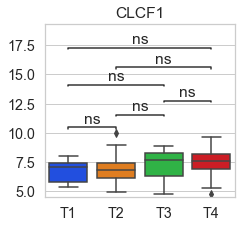

In [18]:
import seaborn as sns
sns.set(font_scale=1.3)
sns.set_style("%s" %theme)
import pandas as pd
import matplotlib.pyplot as plt

from statannot import add_stat_annotation
from scipy.stats import shapiro, levene

table = pd.read_csv('./target.csv')
table.columns = ['name', 'type', 'value']
table = table.sort_values('name')


gene = [[] for _ in range(len(table['type'].unique()))]
name = list(table['type'].unique())

mask = [[] for _ in range(len(table['type'].unique()))]

temp = pd.DataFrame()
for j in range(len(gene)):
    for i in range(len(mask)):
        mask[i] = table['type'] == table['type'].unique()[i]
        gene[i] = temp.append(table[mask[i]])

fig = plt.figure(figsize=(15,15))
for i in range(0,len(gene)):    
    fig.add_subplot(5, 5, i+1)

    f1 = sns.boxplot(data=gene[i], x = gene[i]['name'], y = gene[i]['value'], palette="%s" %pallete)
                   
    plt.xlabel('')
    plt.ylabel('')
    f1.set_title('%s' %name[i])
    
    if(len(gene[i]['name'].unique()) == 2):
        if shapiro(gene[i]['value'])[1] > 0.05:
            m = gene[i]['name'] == gene[i]['name'].unique()[0]
            if levene(gene[i][m]['value'],gene[i][-m]['value'])[1] > 0.05:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                            box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1]))
                                        ],
                            test='t-test_ind', text_format='star', loc='inside', verbose=2)
            else:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                            box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1]))
                                        ],
                            test='t-test_welch', text_format='star', loc='inside', verbose=2)
        else:
            add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1]))
                                    ],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

    if(len(gene[i]['name'].unique()) == 3):
        if shapiro(gene[i]['value'])[1] > 0.05:
            m = gene[i]['name'] == gene[i]['name'].unique()[0]
            m2 = gene[i]['name'] == gene[i]['name'].unique()[1]
            m3 = gene[i]['name'] == gene[i]['name'].unique()[2]
            if levene(gene[i][m]['value'],gene[i][m2]['value'],gene[i][m3]['value'])[1] > 0.05:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2]))
                                        ],
                            test='t-test_ind', text_format='star', loc='inside', verbose=2)
            else:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2]))
                                        ],
                            test='t-test_welch', text_format='star', loc='inside', verbose=2)
        else:
            add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2]))
                                    ],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
            
            
    if(len(gene[i]['name'].unique()) == 4):
        if shapiro(gene[i]['value'])[1] > 0.05:
            m = gene[i]['name'] == gene[i]['name'].unique()[0]
            m2 = gene[i]['name'] == gene[i]['name'].unique()[1]
            m3 = gene[i]['name'] == gene[i]['name'].unique()[2]
            if levene(gene[i][m]['value'],gene[i][m2]['value'],gene[i][m3]['value'])[1] > 0.05:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[2]), (gene[i]['name'].unique()[3]))
                                        ],
                            test='t-test_ind', text_format='star', loc='inside', verbose=2)
            else:
                add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[2]), (gene[i]['name'].unique()[3]))
                                        ],
                            test='t-test_welch', text_format='star', loc='inside', verbose=2)
        else:
            add_stat_annotation(f1, data=gene[i], x = gene[i]['name'], y = gene[i]['value'],
                        box_pairs=[((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[1])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[0]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[2])),
                                   ((gene[i]['name'].unique()[1]), (gene[i]['name'].unique()[3])),
                                   ((gene[i]['name'].unique()[2]), (gene[i]['name'].unique()[3]))
                                    ],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
            
        
    fig.tight_layout()
    plt.savefig('./res.png', dpi=300, bbox_inches='tight')